Zaczynamy od zaimportowania niezbędnych bilbiotek:

*   pandas - do magazynowania i obróbki danych 
*   numpy - przyśpiesza obliczenia matematyczne i zawiera wiele przydatnych funkcji matematycznych

oraz dołączenia modeli z biblioteki sklearn





In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

%matplotlib inline

Następnie wczytujemy plik zawierający dane w formacie csv do zmiennej "database", poprzez wykorzystanie funkcji "read_csv" z biblioteki pandas. Funkcja "head()" wyświetla nam indeksy kolumn oraz fragment danych (domyślnie jest to 5 wierszy, można zmienić tą liczbę poprzez wpisanie odpowiadającej nam liczby w nawiasie)


In [0]:
database  = pd.read_csv('https://raw.githubusercontent.com/PawelCislik/MLW_PROJECT_2019/master/final_data_ecb.csv', delimiter= ';')
database.head()

,participant,sound,duration,Td,K6,Rd,A2,V2
0,MZ078,CEGis,1300,1300,0P,1955,DI,DI
1,MG082,CEGis,1300,1300,0P,1383,DI,DI
2,KS119,CEGis,1300,1300,0P,1486,DI,DI
3,MF088,CEGis,1300,1300,0P,2037,DI,DI
4,KM066,CEGis,1300,1300,0P,1599,DI,DI


Poprzez użycie nazwy zmiennej wraz z nawiasami kwadratowymi w które wpisana jest nazwa nowej lub isteniejącej kolumny: **[ "nazwa kolumny" ] **tworzymy nową kolumnę, lub dopisujemy i modyfikujemy dane w już istniejącej. 
Funkcja "abs" zwraca wartość absolutną wyrażenia które obejmuje.

In [0]:
database['AE']=abs(database['Rd']-database['Td'])/database['Td']
database['RATIO']=database['Rd']/database['Td']
database.head()

,participant,sound,duration,Td,K6,Rd,A2,V2,AE,RATIO
0,MZ078,CEGis,1300,1300,0P,1955,DI,DI,0.503846,1.503846
1,MG082,CEGis,1300,1300,0P,1383,DI,DI,0.063846,1.063846
2,KS119,CEGis,1300,1300,0P,1486,DI,DI,0.143077,1.143077
3,MF088,CEGis,1300,1300,0P,2037,DI,DI,0.566923,1.566923
4,KM066,CEGis,1300,1300,0P,1599,DI,DI,0.230000,1.230000


Zliczamy ilość poszczególnych wystąpień dla każdego z dźwięków poprzez zliczenie wartości występujących w kolumnie "sound" za pomocą funkcji "value_counts()".

In [0]:
database['V2'].value_counts(normalize=True)

DI     0.68402
SYS    0.31598
Name: V2, dtype: float64

Zamieniamy wartości tekstowe na numeryczne za pomocą funkcji "**factorize()",** oraz wartości puste (NaN) na 0 za pomocą funkcji **fillna() **

In [0]:
database['participant_c'] = database['participant'].factorize()[0]
database['sound_c'] = database['sound'].factorize()[0]
database['duration_c'] = database['duration'].factorize()[0]
database['K6_c'] = database['K6'].factorize()[0]
database['A2_c'] = database['A2'].factorize()[0]
database['V2_c'] = database['V2'].factorize()[0]

database['AE'].fillna(0, inplace=True)
database['RATIO'].fillna(0, inplace=True)
database.head()

,participant,sound,duration,Td,K6,Rd,A2,V2,AE,RATIO,participant_c,sound_c,duration_c,K6_c,A2_c,V2_c
0,MZ078,CEGis,1300,1300,0P,1955,DI,DI,0.503846,1.503846,0,0,0,0,0,0
1,MG082,CEGis,1300,1300,0P,1383,DI,DI,0.063846,1.063846,1,0,0,0,0,0
2,KS119,CEGis,1300,1300,0P,1486,DI,DI,0.143077,1.143077,2,0,0,0,0,0
3,MF088,CEGis,1300,1300,0P,2037,DI,DI,0.566923,1.566923,3,0,0,0,0,0
4,KM066,CEGis,1300,1300,0P,1599,DI,DI,0.230000,1.230000,4,0,0,0,0,0


Za pomocą funkcji: **"hist()"** tworzymy histogramy funkcji, pozwalające zobaczyć jak rozkładają się wartości naszych danych na wykresie

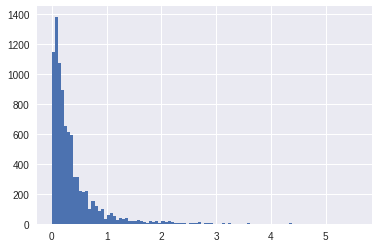

In [0]:
database.AE.hist(bins=100);

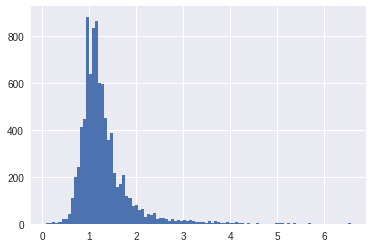

In [0]:
database.RATIO.hist(bins=100);

In [0]:
database.K6.value_counts(normalize=True)

T0    0.385093
ST    0.273970
PQ    0.138453
0P    0.121174
RS    0.042010
QR    0.039300
Name: K6, dtype: float64

Funkcja **"describe()""** pozwala nam zobaczyć podstawowe informacje statystyczne dotyczące wybranej kolumny, jak np. średnia, odchylenie standardowe, kwartyle itp.

In [0]:
database.AE.describe()

count    8855.000000
mean        0.367821
std         0.478757
min         0.000357
25%         0.088333
50%         0.218571
75%         0.442950
max         5.562308
Name: AE, dtype: float64

In [0]:
database.sound.value_counts()

CEG      2958
CEGis    2952
CEsG     2945
Name: sound, dtype: int64

In [0]:
database.Rd.describe()

count     8855.000000
mean      2551.002597
std       1038.467919
min        238.000000
25%       1868.000000
50%       2426.000000
75%       2985.000000
max      11969.000000
Name: Rd, dtype: float64

In [0]:
database.K6.value_counts(normalize=True)

T0    0.385093
ST    0.273970
PQ    0.138453
0P    0.121174
RS    0.042010
QR    0.039300
Name: K6, dtype: float64

W zmiennej "features" przechowujemy nasze atrybuty, które wykorzystamy przy tworzeniu modelu i predykcji żądanych wartości. 

X stanowi macierz cech, które wykorzystujemy do predykcji, 

y jest odpowiedzią dla zadanych w macierzy X parametrów/cech



In [0]:
features = ['duration','sound_c']
X = database[features].values
y = database['V2'].values 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#funkcja train_test_split() zwracam nam 4 zestawy danych, które są kolejno przypisywane do zmiennych: X_train, X_test, y_train, y_test
X_train.shape, X_test.shape
#ta linijka wyświetla nam wielkość zbiorów X-treningowego i X-testowego, czyli jak rozdzielone są dane na część treningową i na testową

((6198, 2), (2657, 2))

In [0]:
#wybieramy odpowiedni model
model = DecisionTreeClassifier(max_depth = 10)
#trenujemy nasz model
model.fit(X_train, y_train)
#tworzymy predykcje za pomoca naszego modelu, na podstawie danych testowych X
y_predict = model.predict(X_test)
#porównujemy wartości otrzymane z predykcji z rzeczywistymi i na tej podstawie możemy ocenić trafność modelu
accuracy_score(y_test, y_predict)
# y_predict

0.6706812194203989

In [0]:
# import matplotlib.pyplot as plt
# plt.hist(y_predict, bins=5)
#database.K6_c.hist(bins=6)

In [0]:
model = RandomForestClassifier(max_depth = 10, n_estimators = 50)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

accuracy_score(y_test, y_predict)

0.6706812194203989

In [0]:
database['sound_dur_c'] = database.apply(lambda x: '{} {}'.format(x['sound_c'], x['duration_c']), axis=1).factorize()[0]

In [0]:
features = ['sound_c', 'duration_c','A2_c', 'K6_c','sound_dur_c']
X = database[features].values
y = database['Rd'].values
#y = database['RATIO'].values

model = DecisionTreeRegressor(max_depth = 10)
scores = cross_val_score(model, X, y, cv=3, scoring = 'neg_mean_absolute_error')

np.mean(scores), np.std(scores)

(-634.652216723275, 22.30402644593191)

In [0]:
features = ['sound_c', 'duration_c','A2_c', 'K6_c','sound_dur_c']
X = database[features].values
y = database['Rd'].values
#y = database['RATIO'].values

model = DecisionTreeRegressor(max_depth = 10)
scores = cross_val_score(model, X, y, cv=3, scoring = 'neg_mean_absolute_error')

np.mean(scores), np.std(scores)

(-634.652216723275, 22.30402644593191)